# IMPORT STATEMENTS

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# LOAD THE DATASET

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='q2qVg0DUK3_Sa1hwvM9F_P6wWB52ZKXLDokyQh7JVS5E',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-yqus1pytond7sq'
object_key = 'Admission_predict 1.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.drop(["Serial No."], axis=1, inplace=True)

In [8]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [11]:
data.isnull().sum() 

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# VISUALIZATION

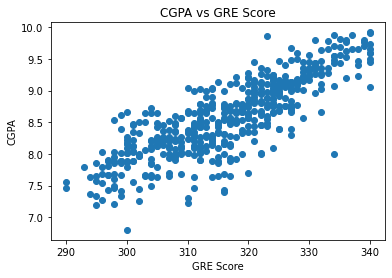

In [12]:
plt.scatter(data['GRE Score'],data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

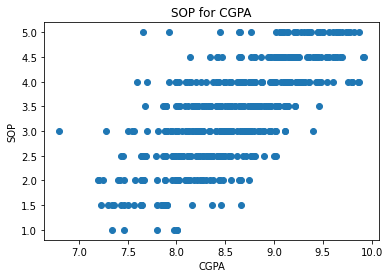

In [13]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

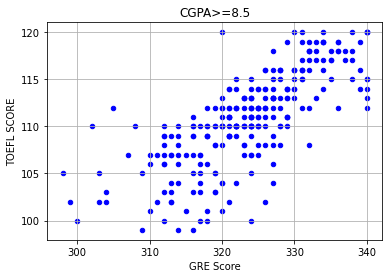

In [14]:
data[data.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)

plt.show()

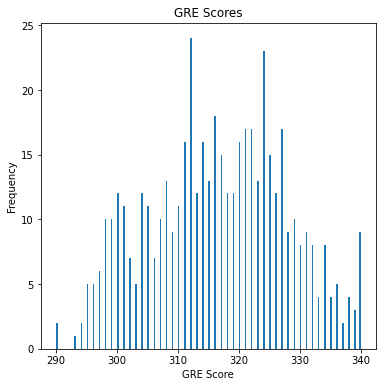

In [15]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

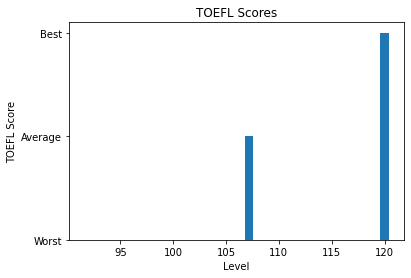

In [16]:
p = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()

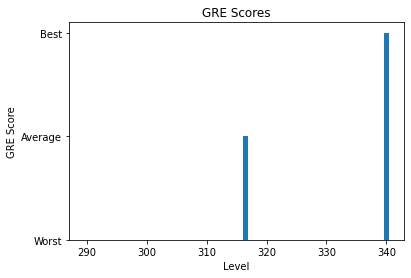

In [17]:
g = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

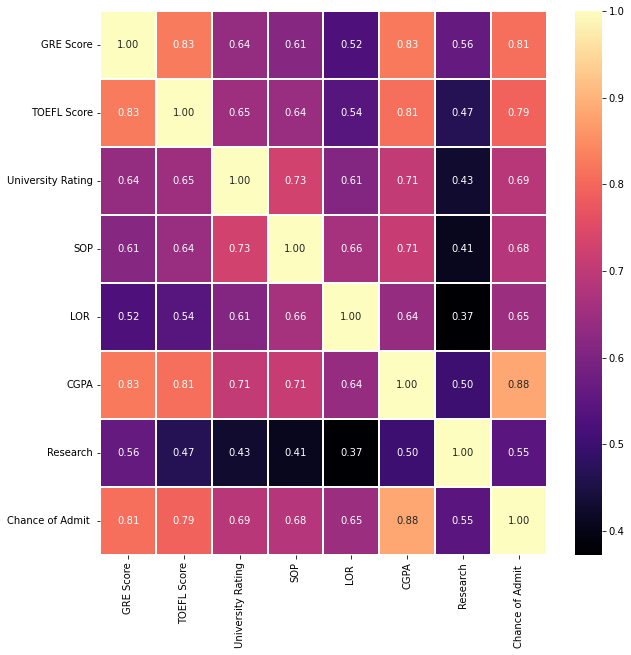

In [18]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='count'>

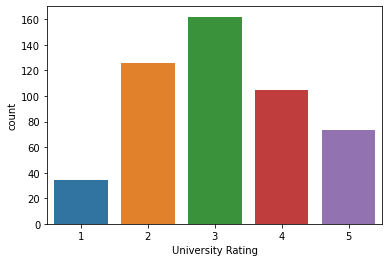

In [19]:
data.Research.value_counts()

sns.countplot(x="University Rating",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

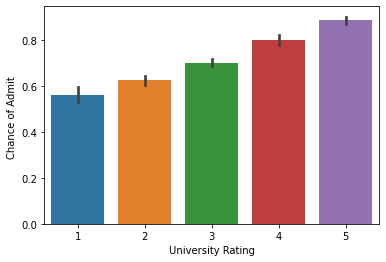

In [20]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

#  Finding the dependent and independent variable.

In [21]:
X=data.drop(['Chance of Admit '],axis=1) #input data_set
y=data['Chance of Admit '] #output labels

# TRAINING AND TESTING SPLIT

In [22]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# DATA PREPROCESSING

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
439,0.44,0.464286,0.25,0.125,0.500,0.464945,0.0
149,0.42,0.500000,0.25,0.625,0.500,0.391144,1.0
381,0.58,0.464286,0.50,0.500,0.625,0.542435,1.0
489,0.24,0.642857,0.50,0.750,0.875,0.479705,0.0
215,0.80,0.857143,1.00,1.000,0.875,0.797048,1.0


# MODELING AND TRAINING

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
rgr = GradientBoostingRegressor()
rgr.fit(X_train,y_train)

GradientBoostingRegressor()

In [25]:
X_train.shape

(425, 7)

In [26]:
y_train.shape


(425,)

In [27]:
rgr.score(X_test,y_test)

0.7060310134866128

In [28]:
y_predict=rgr.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np


print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict)) 
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.3164910838782627
Mean Squared Error: 0.1218910658729976
Root Mean Squared Error: 0.3491290103571996


In [30]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [31]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)

lr = lore.fit(X_train, y_train)


In [32]:
y_pred = lr.predict(X_test)

# Model Evaluation

In [57]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 0.88
Recall Score: 1.0
ROC AUC Score: 0.5
Confussion Matrix:
 [[ 0  9]
 [ 0 66]]


# SAVING THE MODEL

In [34]:
# import pickle

In [35]:
# pickle.dump(lr, open("university.pkl", "wb")) #logistic regression model
# pickle.dump(rgr, open("university_percent.pkl", "wb")) #regression model

In [36]:
import pickle

In [37]:

pickle.dump(lr, open("university.pkl", "wb")) #logistic regression model
lr = pickle.load(open("university.pkl", "rb")) #logistic regression model
pickle.dump(rgr, open("university_percent.pkl", "wb")) #regression model

In [38]:
gd = pickle.load(open("university_percent.pkl", "rb")) #regression model

# ESTABLISHING CONNECTION TO IBM WATSON ML SERVICE

In [39]:
!pip install ibm_watson_machine_learning
from ibm_watson_machine_learning import APIClient
import json

In [40]:
uml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "COBEXkhE3IDQm-UdzBYOIencjauOV90h5nofmkAwCY0f"
}
client = APIClient(uml_credentials)


In [41]:
uml_client = APIClient(uml_credentials)
uml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
1d3dd60b-d999-4c71-bd89-01db5217bbe9  models  2022-11-06T12:09:07.050Z
------------------------------------  ------  ------------------------


# CREATING DEPLOYMENT SPACE

In [42]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    idr = []
    for i in space['resources']:
        idr.append(i['metadata']['id'])
    return idr

In [43]:
space_uid = guid_from_space_name(client, "models")
print(space_uid[0])

1d3dd60b-d999-4c71-bd89-01db5217bbe9


In [44]:
client.set.default_space(space_uid[0])

'SUCCESS'

In [45]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [46]:
MODEL_NAME = 'University predictor'
DEPLOYMENT_NAME = 'UNIVERSITY ADMIT ELIGIBILITY PREDICTOR'
DEMO_MODEL = lr

In [47]:
SPACE_ID = "1d3dd60b-d999-4c71-bd89-01db5217bbe9"
uml_client.set.default_space(SPACE_ID)

'SUCCESS'

# PERSISTING THE LOGISTIC REGRESSION MODEL AND DEPLOYING IT IN IBM CLOUD


In [48]:
software_spec_uid = uml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

model_props = {
    uml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    uml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    uml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

model_details = uml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = X_train,
    training_target = y_train
)


model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'float64'},
      {'name': 'TOEFL Score', 'type': 'float64'},
      {'name': 'University Rating', 'type': 'float64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-15T14:09:58.793Z',
  'id': '6e538d26-77f2-405e-8227-b38e8956048d',
  'modified_at': '2022-11-15T14:10:03.073Z',
  'name': 'University predictor',
  'owner': 'IBMid-667000ECFD',
  'resource_key': '062e933c-3f62-4163-8c7b-0af72793ffb8',
  'space_id': '1d3dd60b-d999-4c71-bd89-01db5217bbe9'},
 'system': {'warnings': []}}

In [49]:
software_uid = client.software_specifications.get_uid_by_name('runtime-22.1-py3.9')
print(software_uid)
meta_props={
     client.repository.ModelMetaNames.NAME: "logistic_model",
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_uid,
     client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23"
}


12b83a17-24d8-5082-900f-0ab31fbfd3cb


In [50]:
model_id = uml_client.repository.get_model_id(model_details)
model_id

'6e538d26-77f2-405e-8227-b38e8956048d'

# Deployment sucessful

In [51]:
deployment_props = {
    uml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    uml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

deployment = uml_client.deployments.create(
    artifact_uid = model_id,
    meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '6e538d26-77f2-405e-8227-b38e8956048d' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='7b65ddc7-3645-436b-a043-cafaab57ef9d'
------------------------------------------------------------------------------------------------


